<a id='intro'></a>
## Introduction

### Dataset Description 

> I choose to work with TMDb movie dataset in this project .It This contains information about 5000 movies collected from The Movie Database (TMDb), including user profit and revenue.


### Question(s) for Analysis

> After completing the data cleaning i am going to try to answer these questions :
What kind of genres have the highest Profit?  
Who are the 10 Highest Grossing Directors?
Does a movies with higher budget gets a high revenue? 
How many movies were made each year?


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
pd.options.display.max_rows = 9999
df_movies = pd.read_csv("tmdb_5000_movies.csv")
df_credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
df_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
df_movies.shape

(4803, 20)

In [6]:
df_credits.shape

(4803, 4)

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [8]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
df_movies.isnull().sum() 

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

The columns homepage and tagline in the movie dataset contains alot of missing data, might need to drop them.

In [10]:
df_credits.isnull().sum() 

movie_id    0
title       0
cast        0
crew        0
dtype: int64

No missing data were found in the credits dataset.

In [11]:
df_movies.duplicated().sum() #the dataset movies doesn't contain duplicated rows

0

In [12]:
df_credits.duplicated().sum() #the dataset credits doesn't contain duplicated rows

0

Both datasets don't have duplicated rows.


### Data Cleaning


In [13]:
df_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


First ,droping columns with too much missing value(homepage and tagline) and those with None values.


In [14]:
df_movies.drop(['homepage','tagline'], axis=1, inplace=True)
df_movies.dropna(inplace=True)


second ,dropping columns that are unnecessary such as original title and keywords since i am not going to use them.

In [15]:
df_movies.drop(['original_title','keywords'], axis=1, inplace=True)


In [16]:
df_movies.shape #checking the shape

(4799, 16)

In [17]:
df_movies.head(1)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800


While checking the dataset ,it's clearly some work need to be dome in th columns genres,production_companies,production_countries,spoken_languages in the movies dataset and cast and crew for the credits dataset.
That's we i developped the functions get_text and get_director to extract information from the wanted columns.

In [18]:
def get_text (df_c):
    eval_ = eval(df_c)
    fi = []
    for sub_li in eval_ :
        fi.append(sub_li.get("name"))
    return ', '.join(fi)

In [19]:
get_text(df_movies['genres'][0])

'Action, Adventure, Fantasy, Science Fiction'

In [20]:
df_movies['genres'] = df_movies['genres'].apply(lambda x :get_text (x) )
df_movies['production_companies'] = df_movies['production_companies'].apply(lambda x :get_text (x) )
df_movies['production_countries'] = df_movies['production_countries'].apply(lambda x :get_text (x) )
df_movies['spoken_languages'] = df_movies['spoken_languages'].apply(lambda x :get_text (x) )

In [21]:
def get_director(df_d):
    eval_ = eval(df_d)
    dir_ = []
    for d_ in eval_ :
        if(d_["job"] == "Director"):
            dir_.append(d_.get("name"))
    return', '.join(dir_)
    

In [22]:
get_director(df_credits['crew'][0])

'James Cameron'

In [23]:
df_credits['actors'] = df_credits['cast'].apply(lambda x :get_text (x) )
df_credits['director'] = df_credits['crew'].apply(lambda x :get_director (x) )


In [24]:
df_credits.drop(['cast','crew'], axis=1, inplace=True)#dropping cast and crew since they aren't needed


the next step is to change datatypes in the column release date must be a datetime.

In [25]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

now the 2 datasets are ready to be merged for analysing later beut fist we neeed to rename the column id in the dataframe credits to movie_id in the dataframe movies.


In [26]:
df_movies.rename(columns = {'id':'movie_id'}, inplace = True)


In [27]:
df = df_movies.merge(df_credits,on = 'movie_id') 


To avoid repetation, drop the extra column title_y and renamethe column title_x to title.


In [28]:
df.rename(columns = {'title_x':'title'}, inplace = True)
df.drop('title_y', axis=1, inplace=True)


At this stage,i created a function get_profit in order to calculate the pofit of each movie in the dataset.

In [29]:
def get_profit(budget, revenue):
    profit = revenue - budget
    return profit
    
df['profit'] = df.apply(lambda x: get_profit(x['budget'], x['revenue']), axis=1)


This is an additional cleanin step that i discovered in the phase EDA while looking in movie genres, i figured out that there is an empty movie genre therefore i replaced it with other to get better visualization later on and to finally save the csv file once and for all.


In [30]:
df.genres = df.genres.replace('','other')

In [367]:
#save our final dataset
df.to_csv('movies.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis



In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4798
Data columns (total 19 columns):
budget                  4799 non-null int64
genres                  4799 non-null object
movie_id                4799 non-null int64
original_language       4799 non-null object
overview                4799 non-null object
popularity              4799 non-null float64
production_companies    4799 non-null object
production_countries    4799 non-null object
release_date            4799 non-null datetime64[ns]
revenue                 4799 non-null int64
runtime                 4799 non-null float64
spoken_languages        4799 non-null object
status                  4799 non-null object
title                   4799 non-null object
vote_average            4799 non-null float64
vote_count              4799 non-null int64
actors                  4799 non-null object
director                4799 non-null object
profit                  4799 non-null int64
dtypes: datetime64[ns](1), float

### Top 10 movie genres

In [40]:
genres = []
for ger_ in df['genres']:
    genres.extend(ger_.split(', '))


In [41]:
df_genres = pd.DataFrame(Counter(genres).most_common(10), columns=['genre', 'total'])

In [42]:
df_genres

,genre,total
0,Drama,2296
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


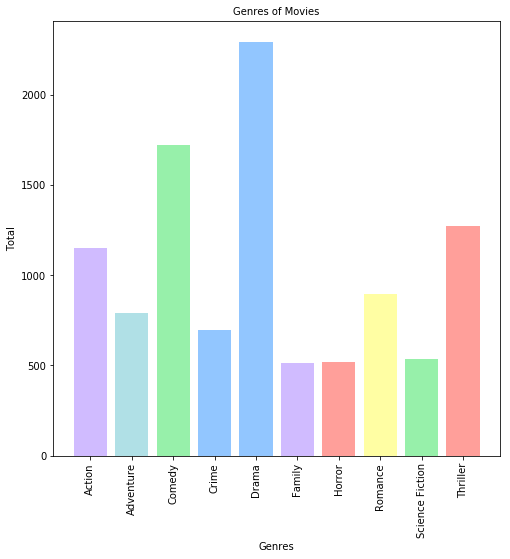

In [45]:
plt.figure(figsize=(8,8))
plt.bar(df_genres.genre, df_genres.total, color=sns.color_palette('pastel'))
plt.title("Genres of Movies", fontsize=10)
plt.xlabel("Genres", fontsize=10)
plt.ylabel("Total", fontsize=10)
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


In order to get the Top 10 movie genres, first we needed to unpack the column genres in the dataframe that we created and split each row in that column in order to create a list containing genres.The next step is to count the duplicated values in that list and create a new dataframe containing the genre and its count.
Finally, i made a barplot to compare different categorical.


As a result, Comedy and Drama are top 2 movie genres.

### What kind of movie genre have the highest Profit?

In [373]:
dict_g_p = {key: 0 for key in df_genres.genre}


In [374]:
dict_g_p

{'Drama': 0,
 'Comedy': 0,
 'Thriller': 0,
 'Action': 0,
 'Romance': 0,
 'Adventure': 0,
 'Crime': 0,
 'Science Fiction': 0,
 'Horror': 0,
 'Family': 0,
 'Fantasy': 0,
 'Mystery': 0,
 'Animation': 0,
 'History': 0,
 'Music': 0,
 'War': 0,
 'Documentary': 0,
 'Western': 0,
 'Foreign': 0,
 'other': 0,
 'TV Movie': 0}

In [375]:
money = df[['genres','revenue','profit']]

In [376]:
money.head()

,genres,revenue,profit
0,"Action, Adventure, Fantasy, Science Fiction",2787965087,2550965087
1,"Adventure, Fantasy, Action",961000000,661000000
2,"Action, Adventure, Crime",880674609,635674609
3,"Action, Crime, Drama, Thriller",1084939099,834939099
4,"Action, Adventure, Science Fiction",284139100,24139100


In [377]:
for i in range(len(money)):
    for j in money.genres[i].split(', '):
            dict_g_p[j] += money['profit'][i]    

In [378]:
dict_g_p

{'Drama': 72227871827,
 'Comedy': 79170805799,
 'Thriller': 62522930845,
 'Action': 103516507916,
 'Romance': 35483779802,
 'Adventure': 112443341088,
 'Crime': 26657394212,
 'Science Fiction': 53816165880,
 'Horror': 15035972672,
 'Family': 57264129064,
 'Fantasy': 55032503330,
 'Mystery': 16549641311,
 'Animation': 37259146809,
 'History': 5441158801,
 'Music': 6021380783,
 'War': 7037772032,
 'Documentary': 791328955,
 'Western': 1571715510,
 'Foreign': -9976856,
 'other': -2027271,
 'TV Movie': -9200000}

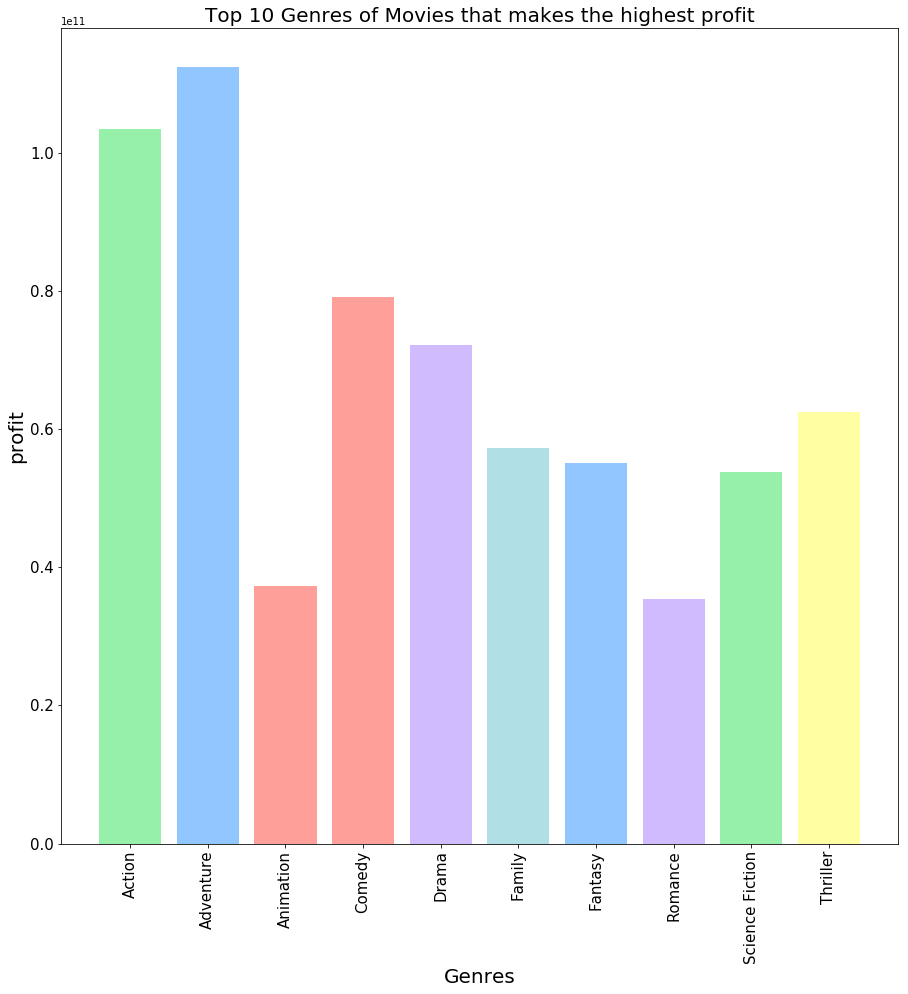

In [446]:
#top 10
top10 = dict(Counter(dict_g_p).most_common(10))
plt.figure(figsize=(15,15))

plt.bar(top10.keys(), top10.values(), color=sns.color_palette('pastel'));

plt.title("Top 10 Genres of Movies that makes the highest profit", fontsize=20)
plt.xlabel("Genres", fontsize=20)
plt.ylabel("profit", fontsize=20)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


In order to answer the question above, I first created a dictionary containing the different genres,then looping throw the selected dataframe the contains genres, revenue and profit of each movie in norder to count the profit of each movie genre. Finally, i made a barplot to compare different results.

Adventure and action are the top 2 movie genres have the top profit in the movie industry.

### The 10 Highest Grossing Directors 

In [470]:
df['profit'].mean()

53263270.249010213

In [480]:
high_profit_dir = df.query('profit >= 53263270.249010213')


In [504]:
new_high = high_profit_dir.groupby('director').sum().sort_values(by="profit",ascending=False)

In [508]:
new_high[['profit']].head(10)

,profit
director,
Steven Spielberg,7382340914
Peter Jackson,5179068099
James Cameron,5116669341
Michael Bay,4366164104
Christopher Nolan,3191760138
Chris Columbus,3131260883
George Lucas,2979336893
Robert Zemeckis,2574440060
Joss Whedon,2424961604


To get the top 10 highest grossing directors, first i calculated the mean profit of all movies, then using the query method to filter the dataframe and select only the directors which their movies made a higher profit then the mean profit of all movies.At this stage,i grouped the directors and summed the total profit of all their movies and sorted them.

The table above shows that movies made by the director Steven Spielberg have top profits.

### Does a movies with higher budget gets a high revenue?

In [472]:
df.budget.median()

15000000.0

In [471]:
low_budget = df.query('budget < 15000000.0')

high_budget = df.query('budget >= 15000000.0')

print("The mean value of low budget movies is:",low_budget.revenue.mean()," while the mean value of the high ones is:" ,high_budget.revenue.mean())

The mean value of low budget movies is: 16610354.156  while the mean value of the high ones is: 147911252.511


At this phase i wanted to check wether a movie has a high budget also get a high revenue.Fisrt i calculated the meadian budget of all movies then split the dataframe into two dataframes the first contain movies with buget below the meadian and the second the ones above the median.Then compared the mean revenue of the movies with low budget with the one's which has high budget.

So the answer is yes movies with high budget make high revenue at the box office.

### How many movie were made each year?

In [521]:
years_prod = [x.year for x in df.release_date]

In [539]:
df_years = pd.DataFrame(Counter(years_prod).most_common(len(years_prod)), columns=['year', 'total_per_year']).sort_values('year')

In [548]:
df_years = df_years.set_index('year')

In [549]:
df_years.head()

,total_per_year
year,
1916,1
1925,1
1927,1
1929,2
1930,1


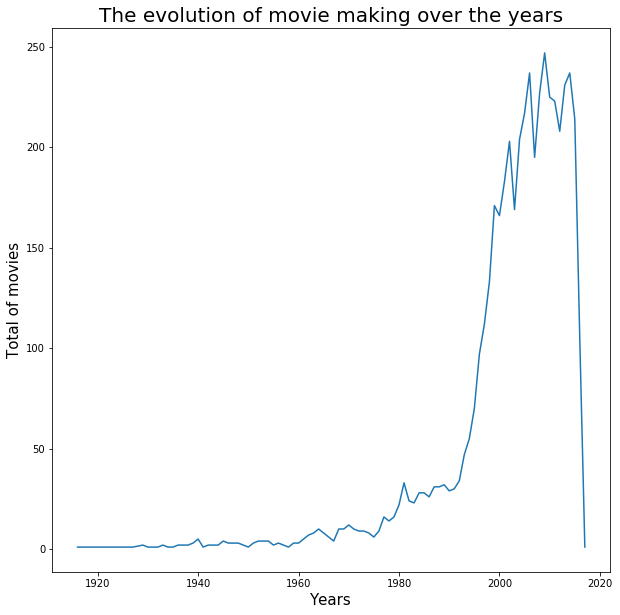

In [555]:
plt.figure(figsize=(10,10))
plt.plot(df_years["total_per_year"])

plt.title("The evolution of movie making over the years", fontsize=20)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Total of movies", fontsize=15)
plt.show()

At this phase i was curious about How many movie were made each year.First i started by extracting years from the column release date and then count the duplicated values.Finally i used plt.plot to plot yeras vs total of the movies made that year to visualize the evolution of movie making.

As the graph shows, there weren't much movies made before the 80's and thisis because there might haven't been records taken by that time. Since the year 1980 the production is increasing and dropped by the year of 2020 due to covid19.

<a id='conclusions'></a>
## Conclusions
>As a conclusion, It's safe to say that movie making has increased over the past year, thow the industry is having drops because of quaratine and covid19 since 2020 .
I noticed that for a movie to be successful , by this a movie which made high profit during it's release , an excellent director have to be choosen and a big budget needed for it. Also , audience are interested to watch Drama and Comedy movie, while the most profitable movie genres are action and adventure.



In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

<a id='Limitations'></a>
## Limitations

Some limitation that i encountered during my analysis are;

* Some columns in both csv files of datatype json. In order to get the data that i want, i developed a function to extract that information. For example the column genres .The solution was to handle it the same way as a dictionary and extract values in the key 'name'.I proceeded by parsing all columns the same way except for the column director in which i need to check first if a certain dictionary has the value 'director' to the key 'job'.
 
* While checking movie genres i encountered an empty string that i decided to change it with the value 'other' inorder to get better results when investigating movie genres.

